#  Boom Bike Sharing Assignment
- Build a multiple linear regression model for the prediction of demand for shared bikes
- Target Variable " cnt "

In [1565]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Inspection

In [1566]:
bike=pd.read_csv('D:/day.csv', parse_dates=['dteday'])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1567]:
bike.shape

(730, 16)

In [1568]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1569]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

# Data Clean Up &  Analysis

In [1570]:
# Looking at describe and info , all fields are fully populated . No Cleanup Required
# Handling categorical variable as per dictionary
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1571]:
bike.season.replace((1,2,3,4),('1_spring','2_summer','3_fall','4_winter'),inplace=True)
bike.season.value_counts()

3_fall      188
2_summer    184
1_spring    180
4_winter    178
Name: season, dtype: int64

In [1572]:
# Year 
# yr : year (0: 2018, 1:2019)
bike.yr.replace((0,1),('2018','2019'),inplace=True)

In [1573]:
bike.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [1574]:
# Month
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [1575]:
# month variable , changing per dictionary
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                                                'Sep','Oct','Nov','Dec'),inplace=True)

In [1576]:
# weekday : day of the week
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [1577]:
# weekday variable
bike.weekday.replace((0,1,2,3,4,5,6),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'),inplace=True)

In [1578]:
# looking at weathersit variable , 

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [1579]:
# converting to category variable as 1 = Clear , 2= Cloudy , 3 - Light Snow , 4 - Heavy Rain
bike.weathersit.replace((1,2,3,4),('Clear','Cloudy','Light Snow','Heavy Rain'),inplace=True)

In [1580]:
bike.weathersit.value_counts()

Clear         463
Cloudy        246
Light Snow     21
Name: weathersit, dtype: int64

In [1581]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1_spring,2018,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1_spring,2018,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1_spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1_spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1_spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1582]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

# EDA
- Categorical Analysis
- Numerical Analsysis
- Correlation & looking at linear relationships

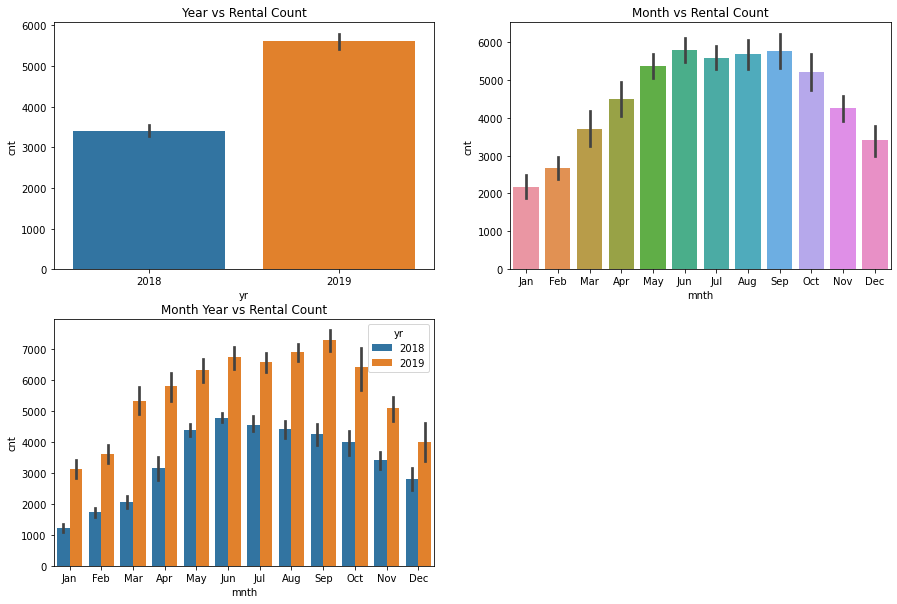

In [1583]:
# Looking at Month & Yr data
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
plt.title('Year vs Rental Count')
sns.barplot(data=bike,x='yr',y='cnt')

plt.subplot(2,2,2)

plt.title('Month vs Rental Count')
sns.barplot(data=bike,x='mnth',y='cnt')

plt.subplot(2,2,3)

plt.title('Month Year vs Rental Count')
sns.barplot(data=bike,x='mnth',y='cnt', hue='yr')
plt.show()

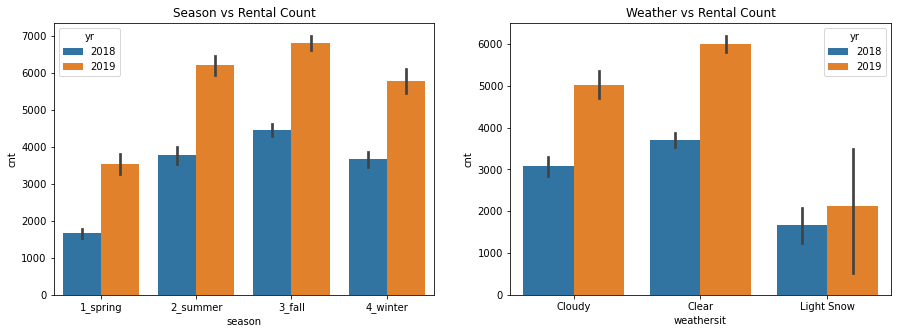

In [1584]:
# Looking at Season Data ,how rentals getting impacted
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Season vs Rental Count')
sns.barplot(data=bike,x='season',y='cnt',hue='yr')
plt.subplot(1,2,2)
plt.title('Weather vs Rental Count')
sns.barplot(data=bike,x='weathersit',y='cnt', hue='yr')
plt.show()

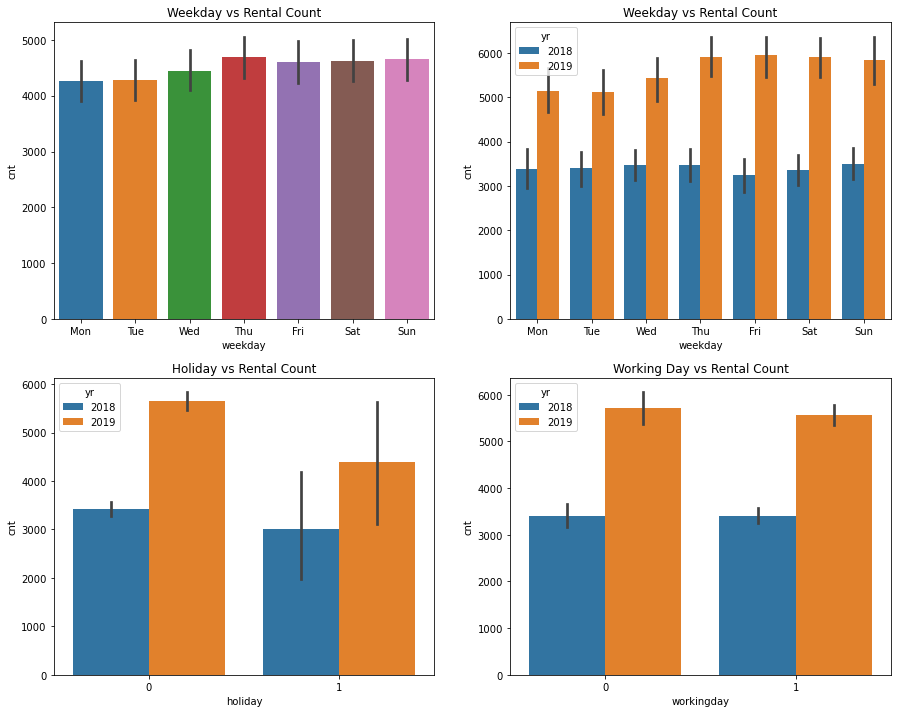

In [1585]:
# Looking at day wise performance 
plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
plt.title('Weekday vs Rental Count')
sns.barplot(data=bike,x='weekday',y='cnt')

plt.subplot(2,2,2)
plt.title('Weekday vs Rental Count')
sns.barplot(data=bike,x='weekday',y='cnt' ,hue='yr')

plt.subplot(2,2,3)
plt.title('Holiday vs Rental Count')
sns.barplot(data=bike,x='holiday',y='cnt',hue='yr')

plt.subplot(2,2,4)
plt.title('Working Day vs Rental Count')
sns.barplot(data=bike,x='workingday',y='cnt',hue='yr')

plt.show()

### Data Insights
 - There is Year on Year growth in rental services
 - Growth is significant from May to Sep
 - Bikes are rented more in Fall Season  & Clear Weather
 - Irrespective of working or non working day , growth is same.
 - Year 2018 Every Day rental services are almost similar wherein Year 2019 , there is more service towards the weekend
 

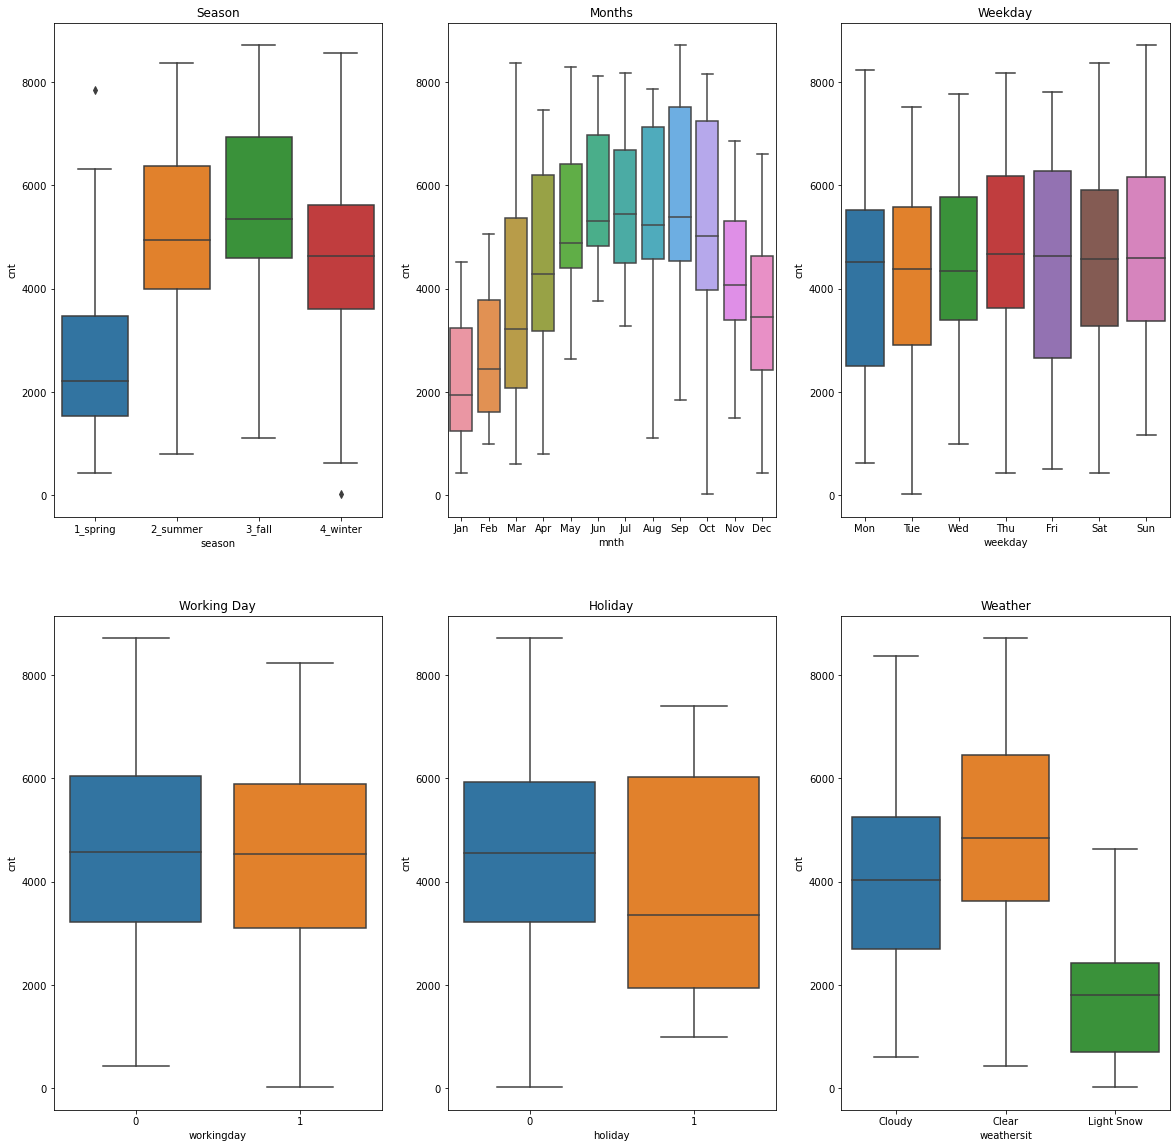

In [1586]:
# Looking at categorical variables with the help of Boxplot for outliers
plt.figure(figsize=[20,20])
plt.subplot(2,3,1)
sns.boxplot(data=bike,y='cnt',x='season')
plt.title('Season')

plt.subplot(2,3,2)
sns.boxplot(data=bike,y='cnt',x='mnth')
plt.title('Months')

plt.subplot(2,3,3)
sns.boxplot(data=bike,y='cnt',x='weekday')
plt.title('Weekday')


plt.subplot(2,3,4)
sns.boxplot(data=bike,y='cnt',x='workingday')
plt.title('Working Day')

plt.subplot(2,3,5)
sns.boxplot(data=bike,y='cnt',x='holiday')
plt.title('Holiday')

plt.subplot(2,3,6)
sns.boxplot(data=bike,y='cnt',x='weathersit')
plt.title('Weather')


plt.show()

### Data Insights
- Season has a outlier in Spring & Weather , no data drop required

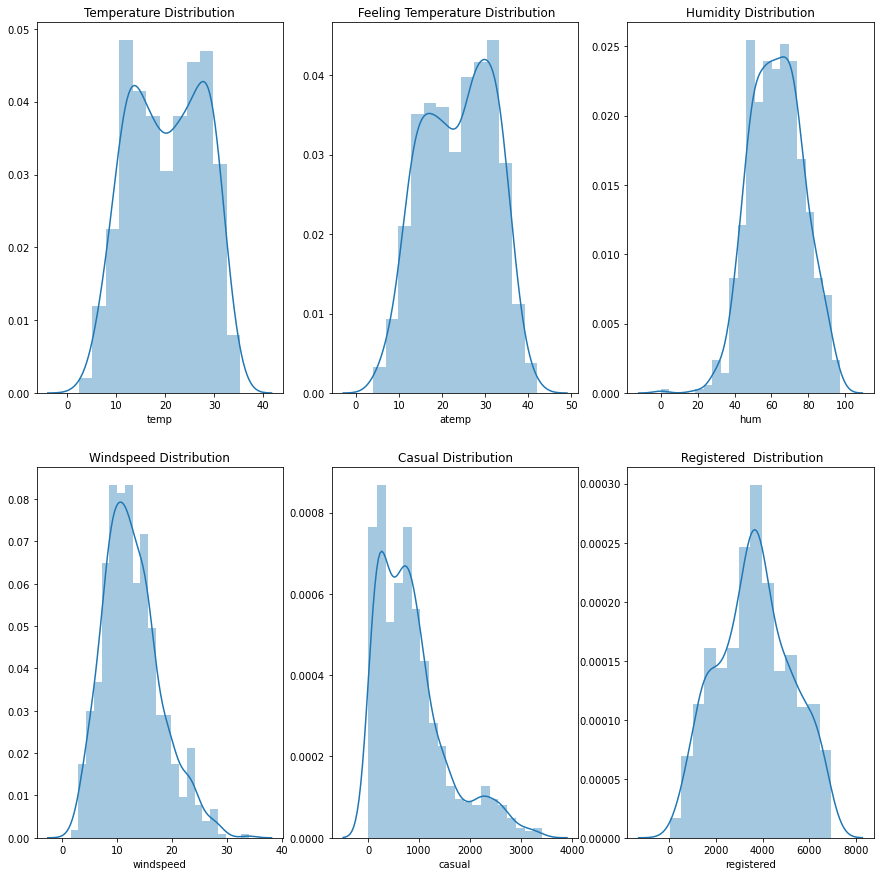

In [1587]:
# Looking at dependent variables distribution
plt.figure(figsize=[15,15])
plt.subplot(2,3,1)
sns.distplot(bike.temp)
plt.title('Temperature Distribution')

plt.subplot(2,3,2)
sns.distplot(bike.atemp)
plt.title(' Feeling Temperature Distribution')

plt.subplot(2,3,3)
sns.distplot(bike.hum)
plt.title('Humidity Distribution')

plt.subplot(2,3,4)
sns.distplot(bike.windspeed)
plt.title('Windspeed Distribution')

plt.subplot(2,3,5)
sns.distplot(bike.casual)
plt.title('Casual Distribution')

plt.subplot(2,3,6)
sns.distplot(bike.registered)
plt.title(' Registered  Distribution')

plt.show()

### Data Insights
- All independent variables looks to be normally distributed

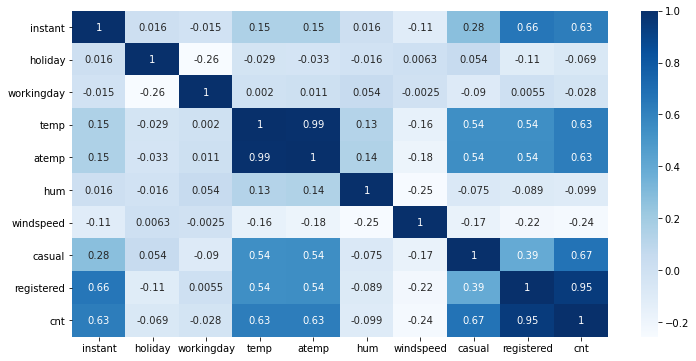

In [1588]:
# Checking correlation of variables
plt.figure(figsize=[12,6])
sns.heatmap(bike.corr(),annot=True, cmap='Blues')
plt.show()

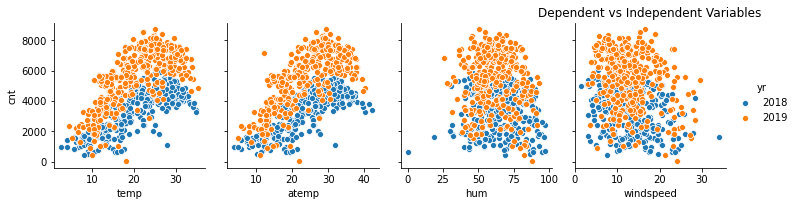

In [1589]:
# Looking at linear relationship
sns.pairplot(data=bike,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt', hue='yr')
plt.title('Dependent vs Independent Variables')
plt.show()

### Data Insights  of relationship
- temp & atemp are highly correlated , exists multicolinearity
- There is same correlation between cnt & temp / atemp
- Humudity and Windspeed is negatively correlated
- Instant is just a serial number, we can drop later as part of modelling 
- casusal+resgisterd = cnt , so these two variables can as well be out of modelling

# Starting Modelling Process
- 1. Data Preparation Dummy Variables
- 2. Scaling variables
- 3. Split test & train model
- 4. Model building
- 5. Model evaluation against test data

In [1590]:
# We have lot of categorical variables , so creating dummy columns for same . Dropping first value
season=pd.get_dummies(bike['season'], drop_first=True)
season.head()


,2_summer,3_fall,4_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1591]:
weather=pd.get_dummies(bike['weathersit'], drop_first=True)
month=pd.get_dummies(bike['mnth'],drop_first=True)
weekday=pd.get_dummies(bike['weekday'],drop_first=True)
print(weather.head())
print(month.head())
print(weekday.head())

   Cloudy  Light Snow
0       1           0
1       1           0
2       0           0
3       0           0
4       0           0
   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0
   Mon  Sat  Sun  Thu  Tue  Wed
0    1    0    0    0    0    0
1    0    0    0    0    1    0
2    0    0    0    0    0    1
3    0    0    0    1    0    0
4    0    0    0    0    0    0


In [1592]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1_spring,2018,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1_spring,2018,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1_spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1_spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1_spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1593]:
# Merge dummy data sets in main data frame bike
bike= pd.concat([bike,season,weather,month,weekday],axis=1)

In [1594]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', '2_summer', '3_fall', '4_winter',
       'Cloudy', 'Light Snow', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [1595]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,2018-01-01,1_spring,2018,Jan,0,Mon,1,Cloudy,14.110847,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,1_spring,2018,Jan,0,Tue,1,Cloudy,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,1_spring,2018,Jan,0,Wed,1,Clear,8.050924,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,1_spring,2018,Jan,0,Thu,1,Clear,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,1_spring,2018,Jan,0,Fri,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [1596]:
# dropping columns not needed for analysis
# as per case study , Casual & registered are number which is already counted in cnt , so dropping the same
# instant , its looks to be serial number , so not using for analysis
# dteday not needed , already we have weekday , month and year variables.
# dropping categorical columns too
bike=bike.drop(['instant','dteday','casual','registered','season','mnth','weekday','weathersit'],axis=1)
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', '2_summer', '3_fall', '4_winter', 'Cloudy', 'Light Snow', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [1597]:
bike.shape

(730, 30)

In [1598]:
# preparing variables list
var=[bike_train.columns[i] for i in range(len(bike_train.columns))]
var.remove('cnt')
var

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 '2_summer',
 '3_fall',
 '4_winter',
 'Cloudy',
 'Light Snow',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep',
 'Mon',
 'Sat',
 'Sun',
 'Thu',
 'Tue',
 'Wed']

# Model Building


In [1599]:
# import sciktlearn and stats models for linear Regression

import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels 
import statsmodels.api as sm


## Modelling with RFE (Recursive Feature Elimination) Method

In [1745]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [1787]:
# split data set
np.random.seed(0)

bike_train,bike_test = train_test_split(bike,train_size=.7,random_state=300)

In [1788]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_summer,3_fall,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
547,2019,0,1,32.048347,35.10190,44.7083,13.082889,6227,0,1,...,0,0,0,0,0,0,0,0,1,0
626,2019,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,1,...,0,0,0,1,0,0,0,1,0,0
309,2018,0,1,14.281653,18.11790,73.4583,6.167631,3649,0,0,...,0,1,0,0,0,0,0,0,1,0
561,2019,0,1,31.296653,36.20625,64.5000,11.000529,6830,0,1,...,0,0,0,0,0,0,0,0,1,0
471,2019,0,1,24.941653,29.92435,39.0417,18.333143,6691,1,0,...,0,0,0,0,0,0,0,0,0,1


In [1789]:
bike_train.shape

(510, 30)

In [1790]:
bike_test.shape

(220, 30)

In [1791]:
# scaling independent variables , using min max scaler
scaler =MinMaxScaler()
n_var=['yr','temp','atemp','hum','windspeed','cnt']
bike_train[n_var]=scaler.fit_transform(bike_train[n_var])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_summer,3_fall,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
547,1.0,0,1,0.927277,0.833624,0.460712,0.412422,0.713875,0,1,...,0,0,0,0,0,0,0,0,1,0
626,1.0,0,1,0.633172,0.617334,0.553027,0.459915,0.870801,0,1,...,0,0,0,1,0,0,0,1,0,0
309,0.0,0,1,0.371152,0.379082,0.756977,0.166191,0.417280,0,0,...,0,1,0,0,0,0,0,0,1,0
561,1.0,0,1,0.903748,0.863180,0.664663,0.338275,0.783249,0,1,...,0,0,0,0,0,0,0,0,1,0
471,1.0,0,1,0.704826,0.695057,0.402319,0.599367,0.767257,1,0,...,0,0,0,0,0,0,0,0,0,1


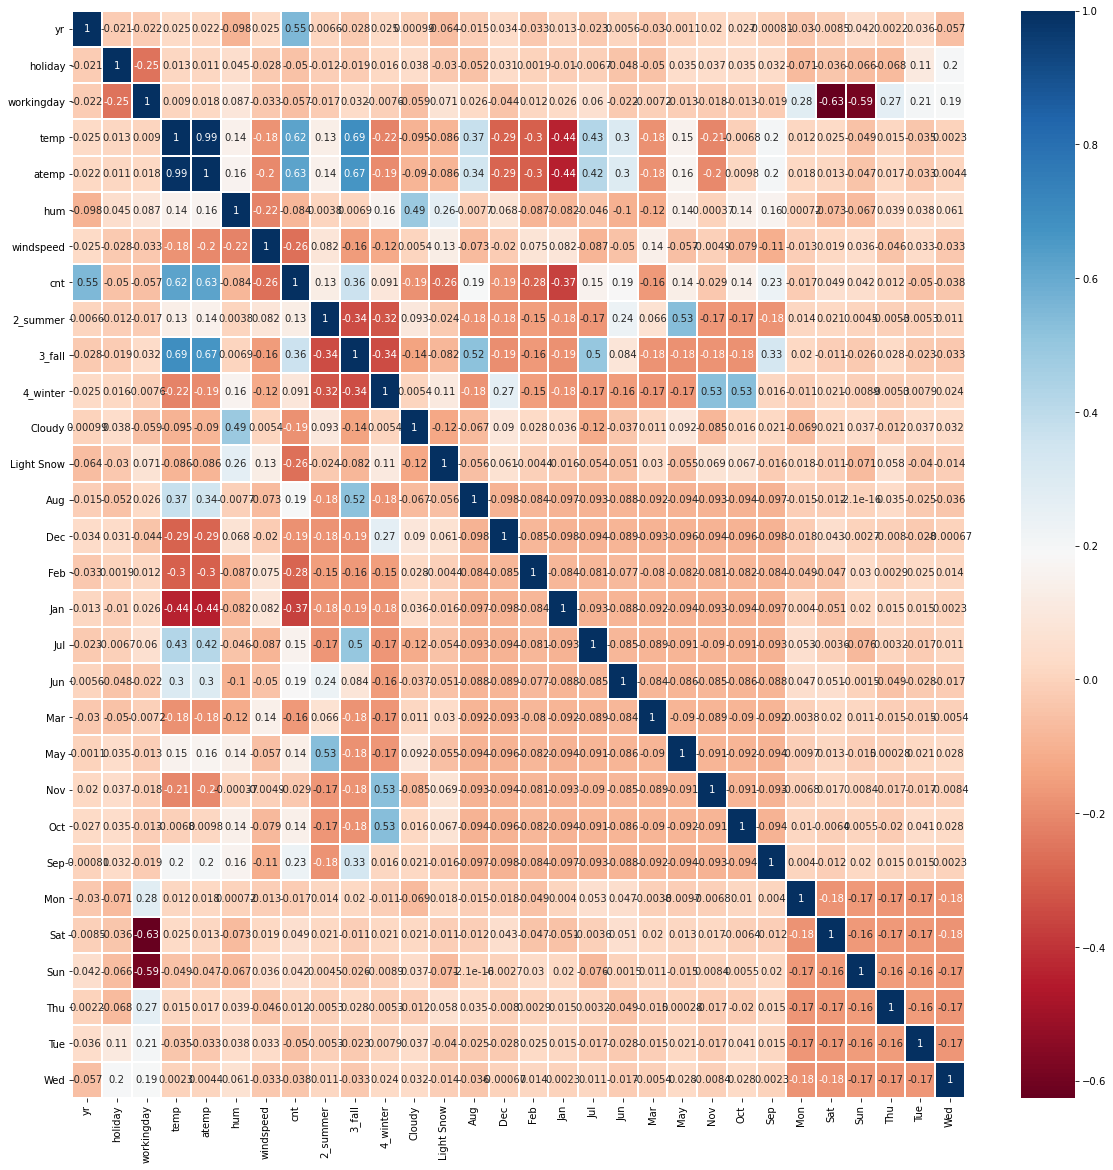

In [1751]:
# checking corellation on train data sent
plt.figure(figsize=[20,20])
sns.heatmap(bike_train.corr(),annot=True,cmap='RdBu',linewidth=1)
plt.show()

### Insights 
1. There is high correlation between Cnt and Year
2. There is high correlation between Cnt and Temp/atemp 
3. Cnt is highest negatively correlated to Spring Season
4. There is also negative correlation in Jan and Feb month
5. Sat and Sun are highly -ve correlated

In [1792]:
bike_train=bike_train.drop(['atemp'],axis=1)

# 1. Model 1 using RFE

In [1793]:
# Running RFE with the output number of the variable equal to 15
# setting X & y training data based out of scaled data
y_train=bike_train.cnt
bike_train=bike_train.drop(['cnt'],axis=1)
X_train=bike_train


# running regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1794]:
# lising columns which support RFE and their rabking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2_summer', True, 1),
 ('3_fall', True, 1),
 ('4_winter', True, 1),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 2),
 ('Feb', False, 9),
 ('Jan', False, 5),
 ('Jul', False, 3),
 ('Jun', False, 10),
 ('Mar', False, 8),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 11),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 6),
 ('Wed', False, 12)]

In [1795]:
# looking at columns which support rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '2_summer',
       '3_fall', '4_winter', 'Cloudy', 'Light Snow', 'Nov', 'Sep', 'Sat',
       'Sun'],
      dtype='object')

In [1796]:
# creating new train set based on RFE selected columns
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,2_summer,3_fall,4_winter,Cloudy,Light Snow,Nov,Sep,Sat,Sun
547,1.0,0,1,0.927277,0.460712,0.412422,0,1,0,0,0,0,0,0,0
626,1.0,0,1,0.633172,0.553027,0.459915,0,1,0,0,0,0,1,0,0
309,0.0,0,1,0.371152,0.756977,0.166191,0,0,1,0,0,1,0,0,0
561,1.0,0,1,0.903748,0.664663,0.338275,0,1,0,0,0,0,0,0,0
471,1.0,0,1,0.704826,0.402319,0.599367,1,0,0,0,0,0,0,0,0


In [1797]:
# looking at VIF of ALL selected variables creating as function , so that we can use later
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
    
    vif = pd.DataFrame()
    X = X
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

cal_vif(X_train_rfe)

,Features,VIF
4,hum,38.06
2,workingday,30.35
3,temp,24.31
7,3_fall,7.41
13,Sat,6.71
5,windspeed,6.61
14,Sun,6.37
6,2_summer,3.57
8,4_winter,3.43
9,Cloudy,2.44


In [1798]:
# fitting model
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          3.37e-194
Time:                        22:57:55   Log-Likelihood:                 530.68
No. Observations:                 510   AIC:                            -1029.
Df Residuals:                     494   BIC:                            -961.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4622      0.096      4.815      0.0

# Model 2 dropping hum 

In [1799]:
X_train_new=X_train_rfe.drop(['hum'],axis=1)
cal_vif(X_train_new)

,Features,VIF
3,temp,22.61
2,workingday,12.43
6,3_fall,7.29
4,windspeed,6.25
5,2_summer,3.55
12,Sat,3.54
7,4_winter,3.42
13,Sun,3.23
0,yr,1.99
10,Nov,1.64


In [1800]:
# fitting model
X_train_lm1= sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm1).fit() 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          3.06e-192
Time:                        22:58:00   Log-Likelihood:                 523.24
No. Observations:                 510   AIC:                            -1016.
Df Residuals:                     495   BIC:                            -953.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3791      0.095      4.000      0.0

# Model 3 after dropping Fall

In [1801]:
X_train_new=X_train_new.drop(['3_fall'],axis=1)
cal_vif(X_train_new)

,Features,VIF
2,workingday,12.05
3,temp,7.60
4,windspeed,6.20
11,Sat,3.45
12,Sun,3.16
6,4_winter,2.09
0,yr,1.97
5,2_summer,1.58
9,Nov,1.57
7,Cloudy,1.56


In [1802]:
# fitting model
X_train_lm3= sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm3).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.74e-188
Time:                        22:58:19   Log-Likelihood:                 511.53
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     496   BIC:                            -935.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3574      0.097      3.694      0.0

# Model 4 

In [1803]:
X_train_new=X_train_new.drop(['Nov'],axis=1)
cal_vif(X_train_new)

,Features,VIF
2,workingday,11.98
3,temp,7.51
4,windspeed,6.19
10,Sat,3.43
11,Sun,3.14
0,yr,1.97
6,4_winter,1.60
5,2_summer,1.58
7,Cloudy,1.54
1,holiday,1.38


In [1764]:
# fitting model
X_train_lm4= sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit() 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.7
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.74e-189
Time:                        22:51:12   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     497   BIC:                            -941.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3666      0.096      3.809      0.0

In [1804]:
X_train_new=X_train_new.drop(['Sun'],axis=1)
cal_vif(X_train_new)

,Features,VIF
3,temp,5.03
2,workingday,4.55
4,windspeed,4.13
0,yr,1.92
10,Sat,1.78
5,2_summer,1.57
7,Cloudy,1.48
6,4_winter,1.44
9,Sep,1.21
1,holiday,1.13


In [1805]:
# fitting model
X_train_lm5= sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit() 
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.18e-189
Time:                        22:58:33   Log-Likelihood:                 508.66
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     498   BIC:                            -942.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1605      0.020      8.167      0.0

In [1806]:
X_train_new=X_train_new.drop(['Sat'],axis=1)
cal_vif(X_train_new)

,Features,VIF
3,temp,4.35
4,windspeed,3.79
2,workingday,3.00
0,yr,1.91
5,2_summer,1.57
7,Cloudy,1.48
6,4_winter,1.39
9,Sep,1.21
8,Light Snow,1.10
1,holiday,1.08


In [1807]:
# fitting model
X_train_lm6= sm.add_constant(X_train_new)
lm6= sm.OLS(y_train,X_train_lm6).fit() 
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     260.4
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          7.84e-191
Time:                        22:59:21   Log-Likelihood:                 508.56
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     499   BIC:                            -948.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1574      0.018      8.648      0.0

In [1808]:
lm6.params

const         0.157371
yr            0.229702
holiday      -0.097564
workingday   -0.029735
temp          0.525834
windspeed    -0.136403
2_summer      0.091796
4_winter      0.136862
Cloudy       -0.085511
Light Snow   -0.266263
Sep           0.106777
dtype: float64

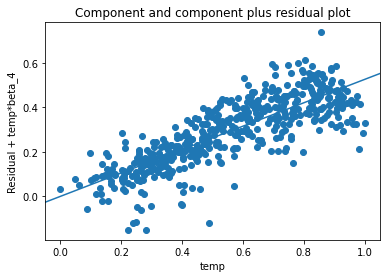

In [1821]:
# Linear Regression Assumptions
# Seeing if model has linear relations or not
sm.graphics.plot_ccpr(lm6, 'temp')
plt.show()

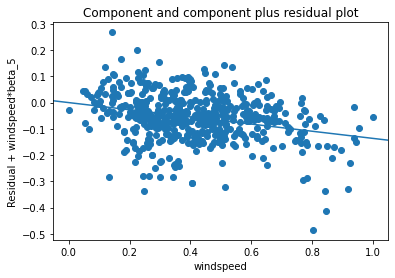

In [1825]:
sm.graphics.plot_ccpr(lm6, 'windspeed')
plt.show()

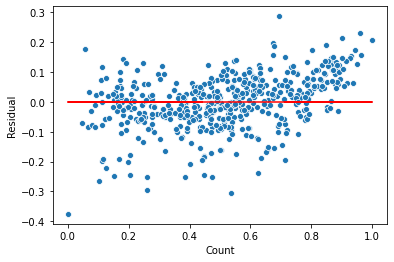

In [1827]:

# Homoscedasticity
y_train_pred = lm6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

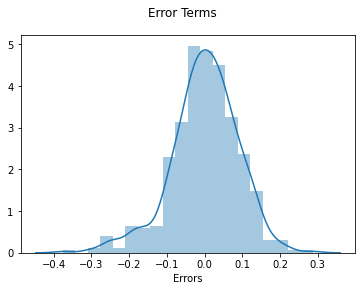

In [1828]:
# Normality of Error
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

# Predicting & Evaluation on Test Data Set

In [1809]:
scaler =MinMaxScaler()
n_var=['yr','temp','atemp','hum','windspeed','cnt']
bike_test[n_var]=scaler.fit_transform(bike_test[n_var])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2_summer,3_fall,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
146,0.0,0,0,0.764751,0.725239,0.593733,0.421058,0.522895,1,0,...,1,0,0,0,0,0,1,0,0,0
263,0.0,0,1,0.651482,0.608705,0.907594,0.107970,0.482644,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0,0,0.415144,0.424028,0.552310,0.248320,0.447440,0,0,...,0,0,0,0,0,0,1,0,0,0
552,1.0,0,0,1.000000,0.951509,0.387679,0.253691,0.542713,0,1,...,0,0,0,0,0,0,1,0,0,0
302,0.0,0,1,0.290984,0.299829,0.555496,0.282038,0.356967,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1810]:
bike_test_n=bike_test
y_test = bike_test_n.pop('cnt')
X_test = bike_test_n

In [1811]:
#Selecting the variables that were part of final model.
m_col=X_train_new.columns
X_test=X_test[m_col]

In [1812]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', '2_summer',
       '4_winter', 'Cloudy', 'Light Snow', 'Sep'],
      dtype='object')

In [1813]:
X_test_m4 = sm.add_constant(X_test)
X_test_m4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 146 to 337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    float64
 2   holiday     220 non-null    int64  
 3   workingday  220 non-null    int64  
 4   temp        220 non-null    float64
 5   windspeed   220 non-null    float64
 6   2_summer    220 non-null    uint8  
 7   4_winter    220 non-null    uint8  
 8   Cloudy      220 non-null    uint8  
 9   Light Snow  220 non-null    uint8  
 10  Sep         220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(5)
memory usage: 13.1 KB


In [1814]:
y_pred = lm6.predict(X_test_m4)

In [1815]:
y_pred

146    0.593865
263    0.476746
426    0.485987
552    0.878303
302    0.379036
         ...   
110    0.415920
573    0.807406
29     0.202014
293    0.469966
337    0.414481
Length: 220, dtype: float64

Text(0, 0.5, 'y_pred')

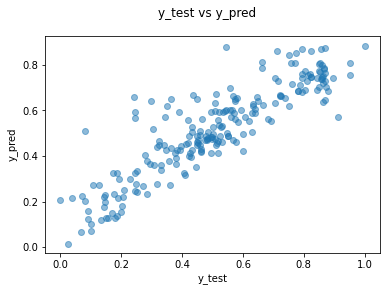

In [1816]:
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [1817]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7777

In [1818]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7671

In [1819]:
from sklearn.metrics import mean_squared_error

RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1122

# Summary
- Model when ran on Test Dataset is giving R2 has 78% performance where as at train data set its giving 84%